
$\beta = \lambda e^{\lambda T_E}$



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("data/data_latest/mononodo_dati_2023_02_14.csv", usecols=['tempo_dati', 'CONTAGI-spe-lisc'])

data.fillna(method = "bfill", inplace=True)
data.rename(columns = {'CONTAGI-spe-lisc' : 'Infections_smoothed'}, inplace = True)
data.dropna(inplace = True)
data.index = data.tempo_dati.astype(int)
data.drop(['tempo_dati'], inplace = True, axis = 1)
data

,Infections_smoothed
tempo_dati,
32,0.000000
33,0.000000
34,0.000000
35,0.000000
36,0.000000
...,...
1133,434094.571429
1134,434161.428571
1135,434227.714286


slope = 0.38808510906787025
nominal slope = 0.38460475374303094
1/beta = 1.1857321027023582
beta = 0.843360821319535


/home/giulio/anaconda3/envs/aml/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


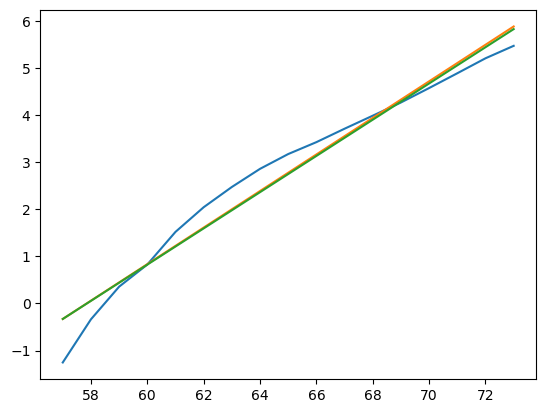

In [27]:
begin = 57
end = 73

mask = (data.index >= begin) & (data.index <= end)

data['logPositivi'] = np.log(data.Infections_smoothed)
plt.plot(data.logPositivi[mask])

from scipy.stats import linregress
from scipy.special import lambertw

fit= linregress(data.index[mask], 
                data.logPositivi[mask])


nominal_slope = (lambertw(0.83*2)/2).real

plt.plot(data.index[mask], 
         data.index[mask] * fit.slope + fit.intercept)
plt.plot(data.index[mask], 
         data.index[mask] * nominal_slope + begin * (fit.slope -nominal_slope) + fit.intercept)


print("slope =", fit.slope)
print("nominal slope =", nominal_slope)
print("1/beta =", 1/(fit.slope * np.exp(fit.slope * 2)))
print("beta =" , (fit.slope * np.exp(fit.slope * 2)))

In [14]:
fit

LinregressResult(slope=0.2835710797468827, intercept=-15.275553491584855, rvalue=0.9992254493096902, pvalue=5.856755770442256e-14, stderr=0.0037224854079587386, intercept_stderr=0.26083973485112805)

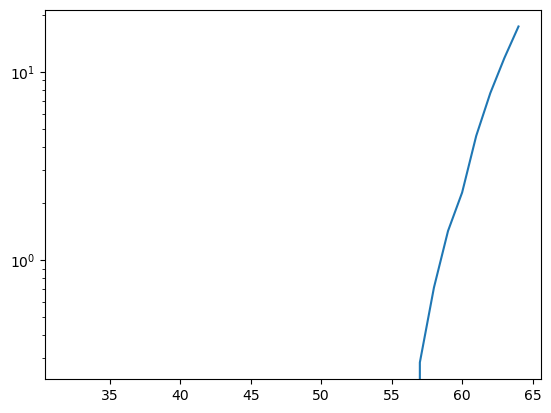

In [69]:
newend = 64
plt.plot(data.Infections_smoothed[(data.index <= newend)])
plt.yscale('log')

In [21]:
slope = 0.26
slope * np.exp(slope * 2)

0.43732718892171046

In [33]:
0.5*lambertw(0.5*0.55)

(0.110283734384632+0j)

In [32]:
3/5.5


0.5454545454545454